In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Dataframes import contratos_df, pagos_df

In [ ]:
grafico_contratos_df = contratos_df[contratos_df['ESTADO'] == 'Terminado']
grafico_grafico_contratos_df['ATRASO'] = (grafico_contratos_df['FECHATERMINO'] - grafico_contratos_df['FECHATERMINOORIGINAL']).dt.days
grafico_contratos_df['ATRASO'] = grafico_contratos_df['ATRASO'].map(lambda x: 'Atrasado' if x > 31 else 'Adelantado/A tiempo').astype('category')

Text(0.5, 0, 'Categoria del proyecto')

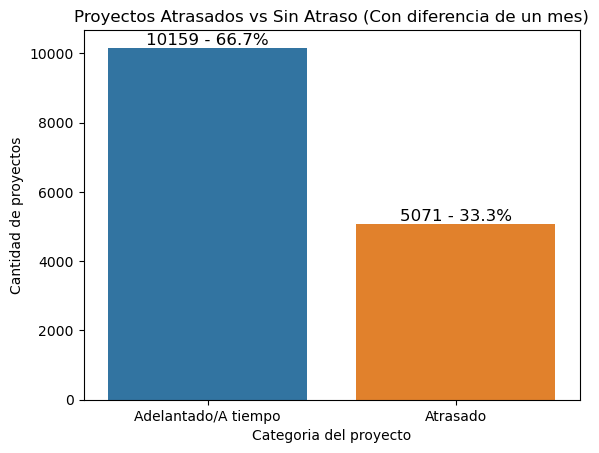

In [ ]:
grafico = sns.countplot(grafico_contratos_df, x='ATRASO', hue='ATRASO', stat='count')
for p in grafico.patches:
    height = p.get_height()
    grafico.text(
        p.get_x() + p.get_width() / 2,
        height + 0.1,
        str(int(height)) + f' - {round(height*100/len(grafico_contratos_df), 2)}%', 
        ha='center', 
        va='bottom',
        fontsize=12  
    )    
plt.title('Proyectos Atrasados vs Sin Atraso (Con diferencia de un mes)')
plt.ylabel('Cantidad de proyectos')
plt.xlabel('Categoria del proyecto')

Grafico de obra que tarda mas en realizarse

In [48]:
grafico_contratos_df = contratos_df[contratos_df['ESTADO'] == 'Terminado']
grafico_contratos_df['DURACION'] = (grafico_contratos_df['FECHATERMINO'] - grafico_contratos_df['FECHAINICIO']).dt.days

In [60]:
grafico_contratos_df = grafico_contratos_df[grafico_contratos_df['DURACION'] >= 0]
gb = grafico_contratos_df.groupby('SERVICIO').mean(numeric_only=True)[['DURACION']]

C:\Users\IMC\AppData\Local\Temp\ipykernel_14700\4242081909.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = grafico_contratos_df.groupby('SERVICIO').mean(numeric_only=True)[['DURACION']]


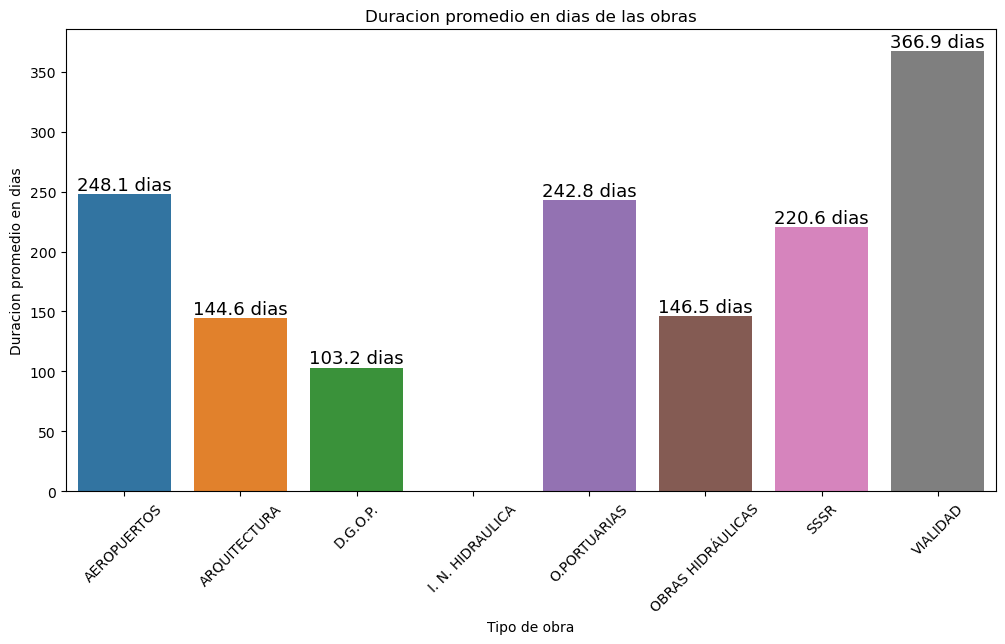

In [ ]:
plt.figure(figsize=(12, 6))
grafico = sns.barplot(data=gb, x='SERVICIO', y='DURACION', hue='SERVICIO')
plt.xticks(rotation=45)
plt.xlabel('Tipo de obra')
plt.ylabel('Duracion promedio en dias')
plt.title('Duracion promedio en dias de las obras')
for p in grafico.patches:
    height = p.get_height()
    grafico.text(
        p.get_x() + p.get_width() / 2,
        height + 0.1,
        str(round(height, 1))+ ' dias', 
        ha='center', 
        va='bottom',
        fontsize=13
    )   

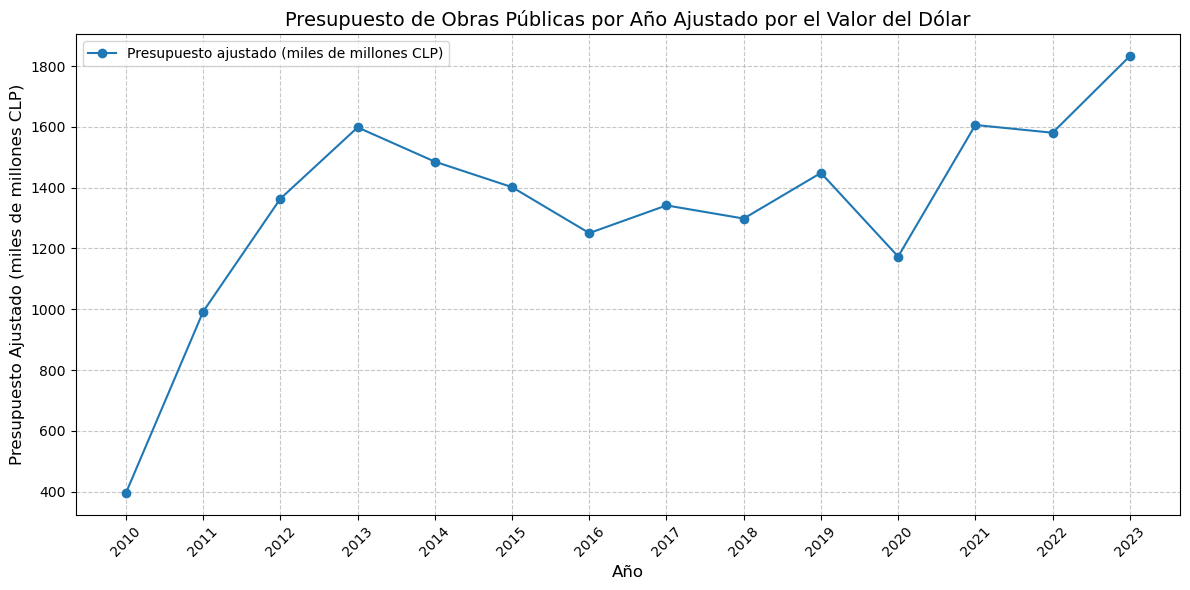

In [87]:
pagos_df['FECHAPAGO'] = pd.to_datetime(pagos_df['FECHAPAGO'])
pagos_df['ANIO'] = pagos_df['FECHAPAGO'].dt.year

presupuesto_anual = pagos_df.groupby('ANIO')['TOTALPAGADO'].sum()

#Convertimos esto a un dataframe

presupuesto = {}

presupuesto['Año'] = presupuesto_anual.index
presupuesto['Presupuesto'] = presupuesto_anual.values

presupuesto = pd.DataFrame(presupuesto)

#Datos de la inflación son sacados de https://www.datosmundial.com/america/chile/inflacion.php

inflacion_dolares = {
    2023: 1.00,  # Valor base
    2022: 800 / 870,  # Valor dólar 2023 / Valor dólar 2022
    2021: 800 / 825.18,  # Valor dólar 2023 / Valor dólar 2021
    2020: 800 / 780.52,  # Valor dólar 2023 / Valor dólar 2020
    2019: 800 / 670.62,  # Valor dólar 2023 / Valor dólar 2019
    2018: 800 / 630.22,  # Valor dólar 2023 / Valor dólar 2018
    2017: 800 / 635.73,  # Valor dólar 2023 / Valor dólar 2017
    2016: 800 / 670.28,  # Valor dólar 2023 / Valor dólar 2016
    2015: 800 / 635.14,  # Valor dólar 2023 / Valor dólar 2015
    2014: 800 / 528.90,  # Valor dólar 2023 / Valor dólar 2014
    2013: 800 / 469.82,  # Valor dólar 2023 / Valor dólar 2013
    2012: 800 / 467.18,  # Valor dólar 2023 / Valor dólar 2012
    2011: 800 / 468.25,  # Valor dólar 2023 / Valor dólar 2011
    2010: 800 / 502.45   # Valor dólar 2023 / Valor dólar 2010
}

#aquí básicamente convierto todos los presupuestos de años anteriores a lo que valdría ese presupuesto hoy 

presupuesto= presupuesto.drop(14)

def poner_puntos(numero): # le doy los puntitos bonitos
    return "{:,}".format(numero).replace(",", ".")

presupuesto['variacion'] = 'N/a'

for x in range(len(presupuesto)):

    numero = round(presupuesto.loc[x, 'Presupuesto'] * inflacion_dolares[int(presupuesto.loc[x, 'Año'])])

    presupuesto.loc[x, 'Presupuesto'] = numero

    if x > 0:

        presupuesto.loc[x, 'variacion'] = poner_puntos(round(numero - presupuesto.loc[x - 1, 'Presupuesto']))

    else:

        presupuesto.loc[x, 'variacion'] = 'N/a'

presupuesto['Presupuesto'] = presupuesto['Presupuesto'].apply(poner_puntos)

import matplotlib.pyplot as plt

presupuesto['Presupuesto'] = presupuesto['Presupuesto'].str.replace('.', '').astype(float) / 1_000_000_000

plt.figure(figsize=(12, 6))
plt.plot(presupuesto['Año'], presupuesto['Presupuesto'], marker='o', label='Presupuesto ajustado (miles de millones CLP)')

plt.title('Presupuesto de Obras Públicas por Año Ajustado por el Valor del Dólar', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Presupuesto Ajustado (miles de millones CLP)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(presupuesto['Año'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\IMC\AppData\Local\Temp\ipykernel_14700\3074293278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grafico_contratos_df['ATRASO'] = (grafico_contratos_df['FECHATERMINO'] - grafico_contratos_df['FECHATERMINOORIGINAL']).dt.days
C:\Users\IMC\AppData\Local\Temp\ipykernel_14700\3074293278.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_atraso_tipo = grafico_contratos_df[grafico_contratos_df.ATRASO > 0].groupby('SERVICIO')['ATRASO'].mean()


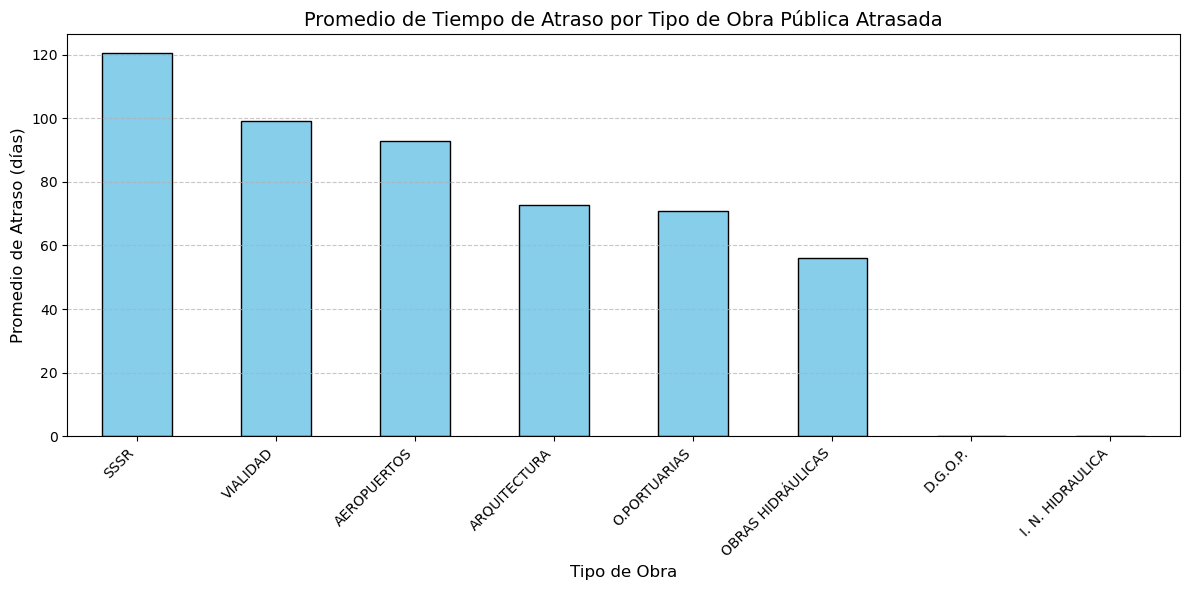

In [86]:
import matplotlib.pyplot as plt
grafico_contratos_df = contratos_df[contratos_df['ESTADO'] == 'Terminado']
grafico_contratos_df['ATRASO'] = (grafico_contratos_df['FECHATERMINO'] - grafico_contratos_df['FECHATERMINOORIGINAL']).dt.days

promedio_atraso_tipo = grafico_contratos_df[grafico_contratos_df.ATRASO > 0].groupby('SERVICIO')['ATRASO'].mean()

plt.figure(figsize=(12, 6))
promedio_atraso_tipo.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Promedio de Tiempo de Atraso por Tipo de Obra Pública Atrasada', fontsize=14)
plt.xlabel('Tipo de Obra', fontsize=12)
plt.ylabel('Promedio de Atraso (días)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()